# Data Analysis

In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [2]:
train_titanic_dataframe = pd.read_csv('train.csv')
test_titanic_dataframe = pd.read_csv('test.csv')

In [93]:
tab = pd.crosstab(train_titanic_dataframe['Pclass'], train_titanic_dataframe['Sex'])
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [3]:
train_titanic_dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


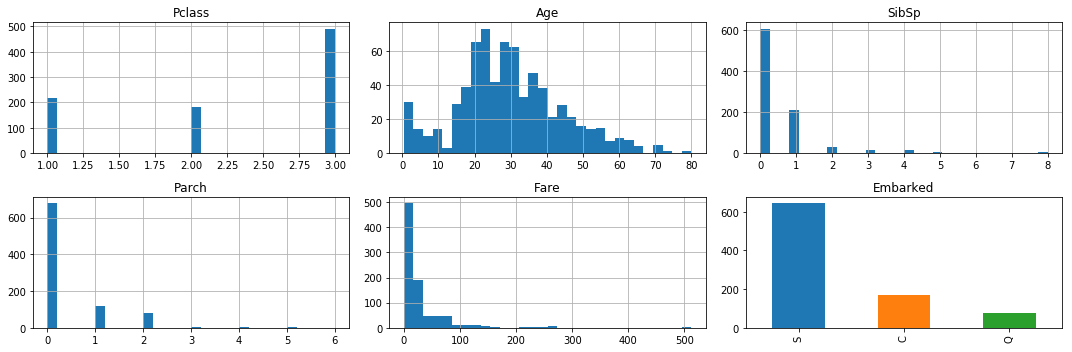

In [32]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
train_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
train_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
train_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
train_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
train_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.subplot(2, 3, 6)
plt.title('Embarked')
train_titanic_dataframe['Embarked'].value_counts().plot(kind='bar')
plt.tight_layout()

In [5]:
test_titanic_dataframe.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_titanic_dataframe.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


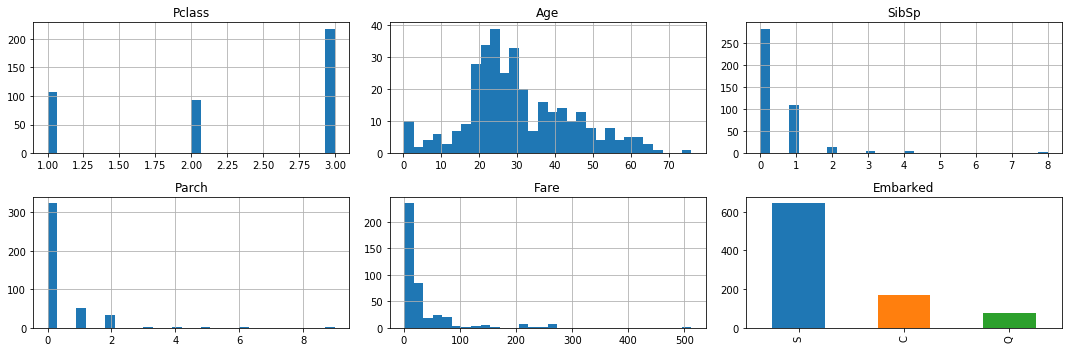

In [33]:
%matplotlib inline

default_no_bins = 30

plt.figure(figsize=(15, 5))
plt.subplot(2, 3, 1)
plt.title('Pclass')
test_titanic_dataframe['Pclass'].hist(bins=default_no_bins)
plt.subplot(2, 3, 2)
plt.title('Age')
test_titanic_dataframe['Age'].hist(bins=default_no_bins)
plt.subplot(2, 3, 3)
plt.title('SibSp')
test_titanic_dataframe['SibSp'].hist(bins=default_no_bins)
plt.subplot(2, 3, 4)
plt.title('Parch')
test_titanic_dataframe['Parch'].hist(bins=default_no_bins)
plt.subplot(2, 3, 5)
plt.title('Fare')
test_titanic_dataframe['Fare'].hist(bins=default_no_bins)
plt.subplot(2, 3, 6)
plt.title('Embarked')
train_titanic_dataframe['Embarked'].value_counts().plot(kind='bar')
plt.tight_layout()

## Pclass

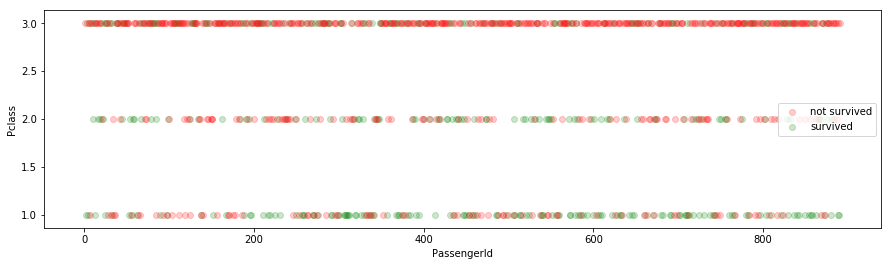

In [8]:
%matplotlib inline

plt.figure(figsize=(15, 4))

survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 1]
not_survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 0]

x_label = 'PassengerId'
y_label = 'Pclass'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

## Sex

In [9]:
total_male = train_titanic_dataframe.loc[train_titanic_dataframe['Sex'] == 'male'].shape[0]
total_female = train_titanic_dataframe.loc[train_titanic_dataframe['Sex'] == 'female'].shape[0]
survived_male = train_titanic_dataframe.loc[(train_titanic_dataframe['Sex'] == 'male') & (train_titanic_dataframe['Survived'] == 1)].shape[0]
survived_female = train_titanic_dataframe.loc[(train_titanic_dataframe['Sex'] == 'female') & (train_titanic_dataframe['Survived'] == 1)].shape[0]

print('Total male = %d' % total_male)
print('Total female = %d' % total_female)
print('Survived male = %d (%.2f%%)' % (survived_male, survived_male * 100.0 / total_male))
print('Survived female = %d (%.2f%%)' % (survived_female, survived_female * 100.0 / total_female))

Total male = 577
Total female = 314
Survived male = 109 (18.89%)
Survived female = 233 (74.20%)


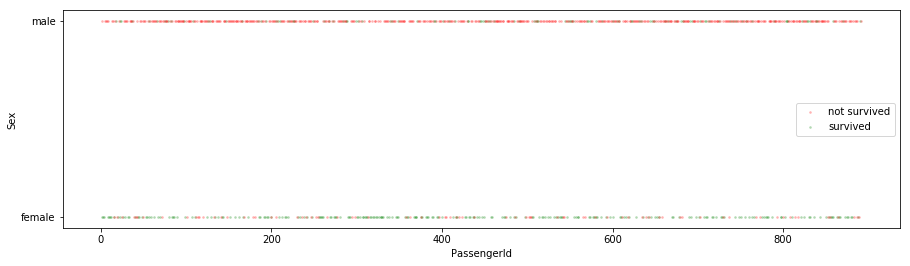

In [10]:
%matplotlib inline

plt.figure(figsize=(15, 4))

survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 1]
not_survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 0]

x_label = 'PassengerId'
y_label = 'Sex'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], s=3, c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], s=3, c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

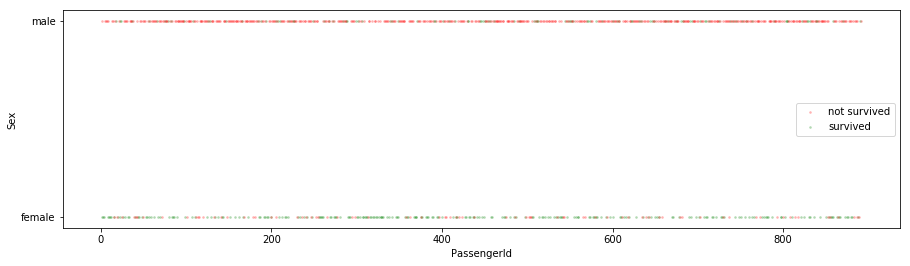

In [11]:
%matplotlib inline

plt.figure(figsize=(15, 4))

survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 1]
not_survived_data = train_titanic_dataframe.loc[train_titanic_dataframe['Survived'] == 0]

survived_male_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1) & (train_titanic_dataframe['Sex'] == 'male')]
not_survived_male_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0) & (train_titanic_dataframe['Sex'] == 'male')]
survived_female_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1) & (train_titanic_dataframe['Sex'] == 'female')]
not_survived_female_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0) & (train_titanic_dataframe['Sex'] == 'female')]

x_label = 'PassengerId'
y_label = 'Sex'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], s=3, c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], s=3, c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

## Age

{'Mr. ': 29.5, 'Mrs. ': 35.0, 'Miss. ': 21.0, 'Master. ': 3.5, 'Don. ': 40.0, 'Rev. ': 46.5, 'Dr. ': 46.5, 'Mme. ': 24.0, 'Ms. ': 28.0, 'Major. ': 48.5, 'Mlle. ': 24.0, 'Col. ': 58.0, 'Capt. ': 70.0, 'Jonkheer. ': 38.0, 'Lady. ': 48.0, 'Sir. ': 49.0, 'Countess. ': 33.0, 'L. ': 54.0}


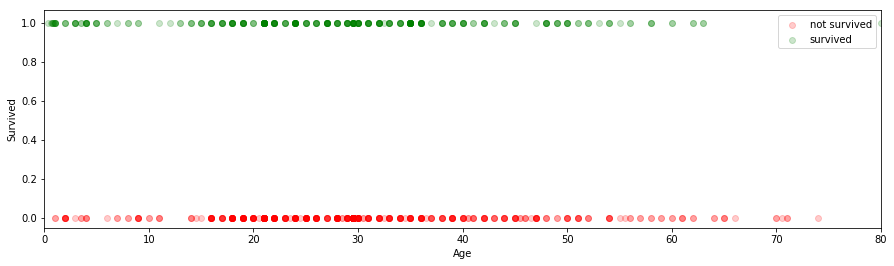

In [82]:
%matplotlib inline

plt.figure(figsize=(15, 4))

# survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1) & (train_titanic_dataframe['Sex'] == 'male')]
# not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0) & (train_titanic_dataframe['Sex'] == 'male')]

median_age = train_titanic_dataframe['Age'].median()
titles = ['Mr. ', 'Mrs. ', 'Miss. ', 'Master. ', 'Don. ', 'Rev. ', 'Dr. ', 'Mme. ', 'Ms. ', 'Major. ', 'Mlle. ', 'Col. ', 'Capt. ', 'Jonkheer. ', 'Lady. ', 'Sir. ', 'Countess. ', 'L. ']
median_age_dict = {}
for title in titles:
    median_age_dict[title] = train_titanic_dataframe['Age'].loc[train_titanic_dataframe['Name'].str.contains(title)].median()
print(median_age_dict)

for title in median_age_dict:
    train_titanic_dataframe.loc[train_titanic_dataframe['Name'].str.contains(title), 'Age'] = train_titanic_dataframe['Age'].loc[train_titanic_dataframe['Name'].str.contains(title)].fillna(median_age_dict[title])

survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1)]
not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0)]

x_label = 'Age'
y_label = 'Survived'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim([0, 80])

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

In [36]:
bins = [0, 0.9999, 5, 11, 53, 63, 80]
labels = ['age_bin_%d' % i for i in range(len(bins) - 1)]
a = pd.cut(train_titanic_dataframe['Age'], bins=bins, labels=labels)

0      age_bin_2
1      age_bin_2
2      age_bin_2
3      age_bin_2
4      age_bin_2
5            NaN
6      age_bin_3
7      age_bin_1
8      age_bin_2
9      age_bin_2
10     age_bin_1
11     age_bin_3
12     age_bin_2
13     age_bin_2
14     age_bin_2
15     age_bin_3
16     age_bin_1
17           NaN
18     age_bin_2
19           NaN
20     age_bin_2
21     age_bin_2
22     age_bin_2
23     age_bin_2
24     age_bin_1
25     age_bin_2
26           NaN
27     age_bin_2
28           NaN
29           NaN
         ...    
861    age_bin_2
862    age_bin_2
863          NaN
864    age_bin_2
865    age_bin_2
866    age_bin_2
867    age_bin_2
868          NaN
869    age_bin_1
870    age_bin_2
871    age_bin_2
872    age_bin_2
873    age_bin_2
874    age_bin_2
875    age_bin_2
876    age_bin_2
877    age_bin_2
878          NaN
879    age_bin_3
880    age_bin_2
881    age_bin_2
882    age_bin_2
883    age_bin_2
884    age_bin_2
885    age_bin_2
886    age_bin_2
887    age_bin_2
888          N

# Other

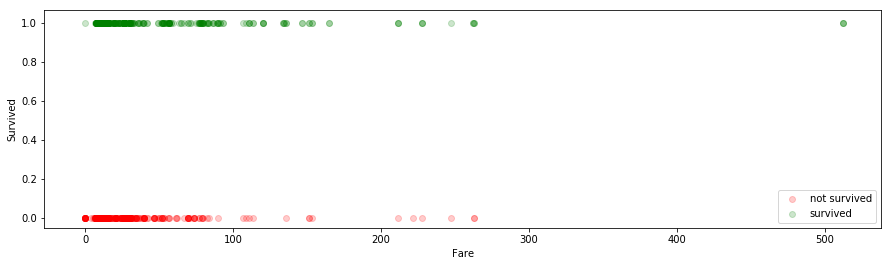

In [85]:
%matplotlib inline

plt.figure(figsize=(15, 4))

# survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1) & (train_titanic_dataframe['Sex'] == 'male')]
# not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0) & (train_titanic_dataframe['Sex'] == 'male')]

survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1)]
not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0)]

x_label = 'Fare'
y_label = 'Survived'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.xlim([0, 600])

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

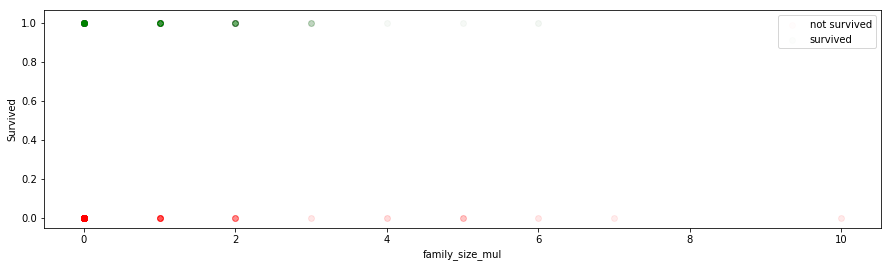

In [77]:
%matplotlib inline

plt.figure(figsize=(15, 4))

# survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1) & (train_titanic_dataframe['Sex'] == 'male')]
# not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0) & (train_titanic_dataframe['Sex'] == 'male')]

train_titanic_dataframe['family_size_mul'] = train_titanic_dataframe['Parch']  + train_titanic_dataframe['SibSp']
survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1)]
not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0)]

x_label = 'family_size_mul'
y_label = 'Survived'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], c='g', alpha=0.01)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], c='r', alpha=0.01)

plt.xlabel(x_label)
plt.ylabel(y_label)
# plt.xlim([0, 16])

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

# Data Preprocessing

In [15]:
from sklearn import preprocessing

In [16]:
total_titanic_dataframe = pd.concat([train_titanic_dataframe, test_titanic_dataframe], axis=0)

median_age = total_titanic_dataframe['Age'].median()
titles = ['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.', 'Ms.', 'Major.', 'Mlle.', 'Col.', 'Capt.', 'Jonkheer.', 'Lady.', 'Sir.', 'Countess.', 'L.']
median_age_dict = {}
for title in titles:
    median_age_dict[title] = total_titanic_dataframe['Age'].loc[total_titanic_dataframe['Name'].str.contains(title)].median()
print(median_age_dict)

median_sibsp = total_titanic_dataframe['SibSp'].median()
median_parch = total_titanic_dataframe['Parch'].median()
median_fare = total_titanic_dataframe['Fare'].median()

def preprocess_data(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['PassengerId'] = titanic_dataframe['PassengerId']
    
    new_dataframe['pclass_1'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 1 else 0.0)
    new_dataframe['pclass_2'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 2 else 0.0)
    new_dataframe['pclass_3'] = titanic_dataframe['Pclass'].apply(lambda val: 1.0 if val == 3 else 0.0)
    
    new_dataframe['sex_male'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'male' else 0.0)
    new_dataframe['sex_female'] = titanic_dataframe['Sex'].apply(lambda val: 1.0 if val == 'female' else 0.0)
    
    for title in median_age_dict:
        titanic_dataframe.loc[titanic_dataframe['Name'].str.contains(title), 'Age'] = titanic_dataframe['Age'].loc[titanic_dataframe['Name'].str.contains(title)].fillna(median_age_dict[title])
        
    age = titanic_dataframe['Age']
    bins = [0, 0.9999, 6, 11, 13.9999, 15.9999, 36, 45, 50, 55, 60, 65, 70, 80]
    labels = [i for i in range(len(bins) - 1)]
    age = pd.cut(age, bins=bins, labels=labels)
    for i in labels:
        new_dataframe['age_bin_%d' % i] = age.apply(lambda val: 1.0 if val == i else 0.0)
    
#     new_dataframe['SibSp'] = titanic_dataframe['SibSp'].apply(lambda val: val if pd.isna(val) is False else median_sibsp)
#     new_dataframe['SibSp'] = new_dataframe['SibSp'].apply(lambda val: 2 if val > 2 else val)
    
#     new_dataframe['Parch'] = titanic_dataframe['Parch'].apply(lambda val: val if pd.isna(val) is False else median_parch)
#     new_dataframe['Parch'] = new_dataframe['Parch'].apply(lambda val: 2 if val > 2 else val)
    
#     new_dataframe['Fare'] = titanic_dataframe['Fare'].apply(lambda val: val if pd.isna(val) is False else median_fare)
    
    CABIN_SECTIONS = ['A','B','C','D','E','F','G','T']
    for cabin_section in CABIN_SECTIONS:
        new_dataframe['cabin_section_%s' % cabin_section] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) == str and val.split(' ')[0][0].lower() == cabin_section.lower() else 0.0)
    new_dataframe['cabin_unknown'] = titanic_dataframe['Cabin'].apply(lambda val: 1.0 if type(val) != str else 0.0)
    # new_dataframe['cabin_number'] = titanic_dataframe['Cabin'].apply(lambda val: int(val.split(' ')[0][1:]) if type(val) == str and val.split(' ')[0][1:] != '' else 0)
    
    new_dataframe['embark_c'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if (type(val) != str) or (type(val) == str and val.lower() == 'c') else 0.0)
    new_dataframe['embark_s'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 's' else 0.0)
    new_dataframe['embark_q'] = titanic_dataframe['Embarked'].apply(lambda val: 1.0 if type(val) == str and val.lower() == 'q' else 0.0)
    
    return new_dataframe

def preprocess_target(titanic_dataframe):
    new_dataframe = pd.DataFrame()
    new_dataframe['Survived'] = titanic_dataframe['Survived']
    
    return new_dataframe

{'Mr.': 30.0, 'Mrs.': 35.0, 'Miss.': 22.0, 'Master.': 4.0, 'Don.': 44.0, 'Rev.': 41.5, 'Dr.': 36.0, 'Mme.': 24.0, 'Ms.': 28.0, 'Major.': 48.5, 'Mlle.': 24.0, 'Col.': 31.0, 'Capt.': 70.0, 'Jonkheer.': 38.0, 'Lady.': 48.0, 'Sir.': 35.5, 'Countess.': 33.0, 'L.': 29.0}


In [17]:
train_titanic_dataframe_reindexed = train_titanic_dataframe.reindex(np.random.permutation(train_titanic_dataframe.index))

train_titanic_dataframe_data_prep = preprocess_data(train_titanic_dataframe_reindexed)
train_titanic_dataframe_target_prep = preprocess_target(train_titanic_dataframe_reindexed)
train_titanic_dataframe_data_prep.head()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6,age_bin_7,age_bin_8,age_bin_9,age_bin_10,age_bin_11,age_bin_12,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_unknown,embark_c,embark_s,embark_q
209,210,1.0,0.0,0.0,1.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
710,711,1.0,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
29,30,0.0,0.0,1.0,1.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
520,521,1.0,0.0,0.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
567,568,0.0,0.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
%matplotlib inline

plt.figure(figsize=(15, 4))

survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 1)]
not_survived_data = train_titanic_dataframe.loc[(train_titanic_dataframe['Survived'] == 0)]

x_label = 'Age'
y_label = 'Survived'

survived = plt.scatter(survived_data[x_label], survived_data[y_label], c='g', alpha=0.2)
not_survived = plt.scatter(not_survived_data[x_label], not_survived_data[y_label], c='r', alpha=0.2)

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.xlim([40, 80])

plt.legend((not_survived, survived), ('not survived', 'survived'))

plt.show()

In [18]:
train_titanic_dataframe_data_prep.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6,age_bin_7,age_bin_8,age_bin_9,age_bin_10,age_bin_11,age_bin_12,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_unknown,embark_c,embark_s,embark_q
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.242424,0.206510,0.551066,0.647587,0.352413,29.325668,0.007856,0.049383,0.023569,0.003367,0.013468,0.683502,0.103255,0.043771,0.026936,0.020202,0.015713,0.003367,0.005612,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.190797,0.722783,0.086420
std,257.353842,0.428790,0.405028,0.497665,0.477990,0.477990,13.203682,0.088337,0.216787,0.151787,0.057961,0.115332,0.465371,0.304462,0.204700,0.161987,0.140770,0.124431,0.057961,0.074743,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.393150,0.447876,0.281141
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,668.500000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
training_data = train_titanic_dataframe_data_prep.head(700)
training_targets = train_titanic_dataframe_target_prep.head(700)
training_targets_one_hot = preprocessing.OneHotEncoder().fit_transform(training_targets).toarray()
training_data.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6,age_bin_7,age_bin_8,age_bin_9,age_bin_10,age_bin_11,age_bin_12,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_unknown,embark_c,embark_s,embark_q
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,441.208571,0.250000,0.204286,0.545714,0.657143,0.342857,29.570243,0.01000,0.047143,0.022857,0.002857,0.012857,0.672857,0.111429,0.047143,0.025714,0.021429,0.017143,0.004286,0.004286,0.018571,0.060000,0.065714,0.038571,0.032857,0.014286,0.002857,0.001429,0.765714,0.194286,0.721429,0.084286
std,260.403834,0.433322,0.403467,0.498262,0.475004,0.475004,13.278598,0.09957,0.212096,0.149555,0.053414,0.112739,0.469505,0.314887,0.212096,0.158395,0.144912,0.129896,0.065372,0.065372,0.135102,0.237657,0.247959,0.192709,0.178390,0.118751,0.053414,0.037796,0.423854,0.395933,0.448617,0.278014
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,208.750000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,434.500000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,665.500000,0.250000,0.000000,1.000000,1.000000,1.000000,36.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,891.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
validation_data = train_titanic_dataframe_data_prep.tail(200)
validation_targets = train_titanic_dataframe_target_prep.tail(200)
validation_targets_one_hot = preprocessing.OneHotEncoder().fit_transform(validation_targets).toarray()
validation_data.describe()

,PassengerId,pclass_1,pclass_2,pclass_3,sex_male,sex_female,Age,age_bin_0,age_bin_1,age_bin_2,age_bin_3,age_bin_4,age_bin_5,age_bin_6,age_bin_7,age_bin_8,age_bin_9,age_bin_10,age_bin_11,age_bin_12,cabin_section_A,cabin_section_B,cabin_section_C,cabin_section_D,cabin_section_E,cabin_section_F,cabin_section_G,cabin_section_T,cabin_unknown,embark_c,embark_s,embark_q
count,200.00000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0,200.00000,200.000000,200.000000,200.000000
mean,466.82000,0.21000,0.22500,0.565000,0.620000,0.380000,28.39000,0.0,0.055000,0.025000,0.005000,0.015000,0.725000,0.075000,0.035000,0.030000,0.015000,0.010000,0.0,0.010000,0.010000,0.025000,0.070000,0.030000,0.050000,0.015000,0.010000,0.0,0.79000,0.175000,0.730000,0.095000
std,245.56154,0.40833,0.41863,0.497001,0.486604,0.486604,12.79429,0.0,0.228552,0.156517,0.070711,0.121857,0.447635,0.264052,0.184241,0.171015,0.121857,0.099748,0.0,0.099748,0.099748,0.156517,0.255787,0.171015,0.218492,0.121857,0.099748,0.0,0.40833,0.380921,0.445074,0.293951
min,1.00000,0.00000,0.00000,0.000000,0.000000,0.000000,1.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000
25%,266.75000,0.00000,0.00000,0.000000,0.000000,0.000000,22.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,0.000000,0.000000
50%,467.50000,0.00000,0.00000,1.000000,1.000000,0.000000,29.00000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,1.000000,0.000000
75%,678.50000,0.00000,0.00000,1.000000,1.000000,1.000000,33.00000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.00000,0.000000,1.000000,0.000000
max,889.00000,1.00000,1.00000,1.000000,1.000000,1.000000,74.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.00000,1.000000,1.000000,1.000000


In [98]:
a = ['Mr', 'Mrs']
print('.|'.join(a))

Mr.|Mrs
